In [278]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(46)
torch.set_default_device(device)

In [279]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(root="data", train=False, transform=ToTensor())
X_train_not_normalized = train_data.data.float().to(device=device)
y_train = train_data.targets.to(device=device)
X_test_not_normalized = test_data.data.float().to(device=device)
y_test = test_data.targets.to(device=device)

X_train = (X_train_not_normalized - X_train_not_normalized.min()) / (
    X_train_not_normalized.max() - X_train_not_normalized.min()
)
X_test = (X_test_not_normalized - X_test_not_normalized.min()) / (
    X_test_not_normalized.max() - X_test_not_normalized.min()
)

In [280]:
import matplotlib.pyplot as plt


# Number of clusters
def cluster_with_kmeans(input_tensor: torch.Tensor, k: int = 10, iteration: int = 100):
    k = 10

    # Initialize cluster centroids randomly
    data = input_tensor.reshape(60000, -1)
    centroids = data[:k]  # random, doesn't matter what we start it with

    # Number of iterations
    iteration = 100

    # K-Means algorithm
    for i in range(iteration):
        # Calculate distances between data points and centroids
        distances = torch.cdist(data, centroids)
        _, labels = distances.min(dim=1)
        # Update centroids
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                centroids[j] = cluster_points.mean(dim=0)
    return labels, centroids


labels, centroids = cluster_with_kmeans(X_train)

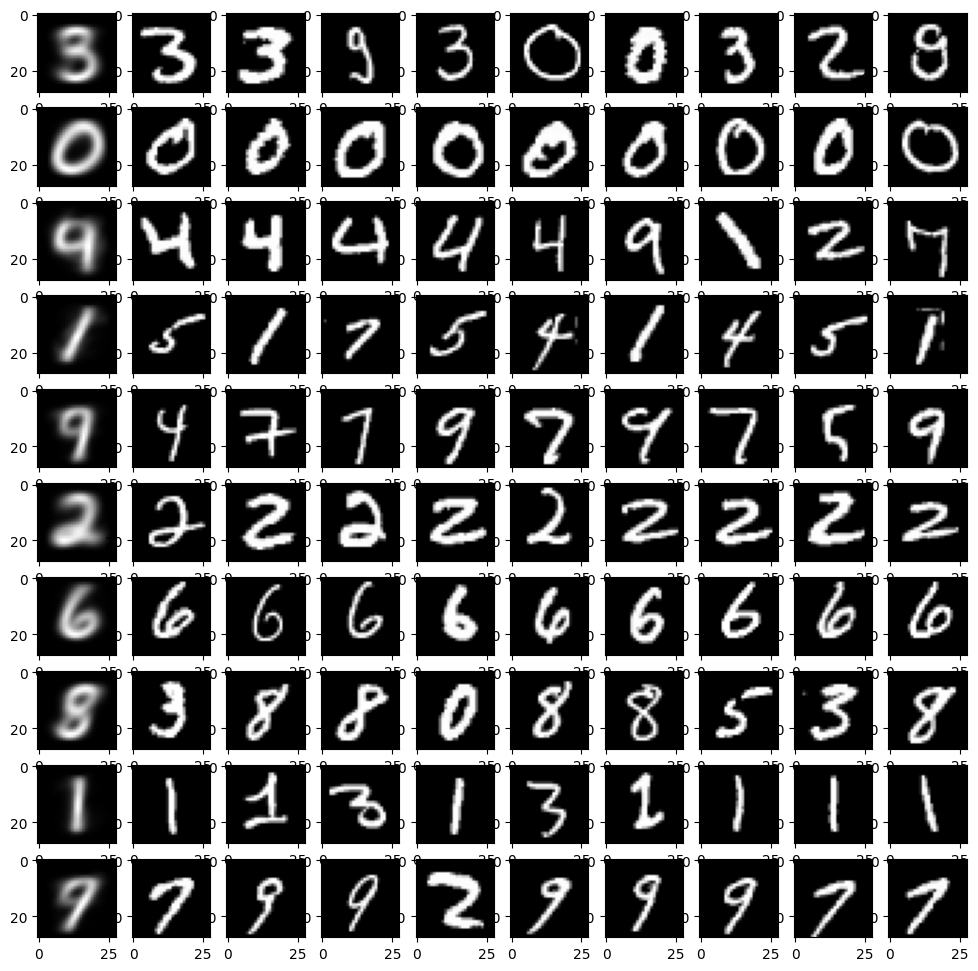

In [281]:
data = X_train
rows = 10
colums = 10
_, axarr = plt.subplots(rows, colums, figsize=(12, 12))
for i in range(rows):
    x = data[labels == i][:colums]
    for j in range(colums):
        axarr[i, j].imshow(x[j].cpu(), cmap="gray")

In [282]:
label_counts = {
    0: X_train[labels == 1].__len__(),
    1: X_train[labels == 3].__len__() + X_train[labels == 8].__len__(),
    2: X_train[labels == 5].__len__(),
    3: X_train[labels == 0].__len__(),
    4: X_train[labels == 2].__len__(),
    5: 0,  # doesn't have a cluster
    6: X_train[labels == 6].__len__(),
    7: X_train[labels == 4].__len__(),
    8: X_train[labels == 7].__len__(),
    9: X_train[labels == 9].__len__(),
}

misclustered = 0.0
for i in range(10):
    error = label_counts[i] - (y_train == i).count_nonzero()
    error = error if error >= 0 else -error
    misclustered += error / y_train.__len__()
print(
    f"K-Means Misclustered: %{(1-misclustered)*100} (%{misclustered*100} Misclustered)"
)
# for i in range(10):
#     label_counts[i]/(y_train==i).count_nonzero()
# for i in range(10):
#     print(f'Kmeans {}{X_train[labels == label_maps[i]].__len__()}')

K-Means Misclustered: %71.21332550048828 (%28.78666877746582 Misclustered)
